In [2]:
import pandas as pd
import numpy as np
drag = pd.read_csv('orders.csv')
drag.head()

,Order,Total,Quantity,Price
0,"Драгоманова 2А CoffeeandFriends, ТРУБОЧКА С КО...",360.00,4.0,90.0
1,"Драгоманова 2А CoffeeandFriends, ГАЛЫЧИНА 2,5%...","1,350.00",5.0,270.0
2,"Драгоманова 2А CoffeeandFriends, ГАЛЫЧИНА 2,5%...","1,350.00",5.0,270.0
3,"Драгоманова 2А CoffeeandFriends, ГАЛЫЧИНА 2,5%...","1,350.00",5.0,270.0
4,"Драгоманова 2А CoffeeandFriends, ГАЛЫЧИНА 2,5%...","1,350.00",5.0,270.0


In [326]:
# Change "Total" to float
drag['Total'] = drag['Total'].str.replace(',','')
drag['Total'] = pd.to_numeric(drag['Total'])

# Add dates
drag['Date'] = drag['Order'].str.extract(r'от.(\d+\.\d+\.20[12][09]).+')
drag['Date'] = pd.to_datetime(drag['Date'], dayfirst=True)
# Clean up "Order"
drag['Order'] = drag['Order'].str.replace('Драгоманова 2А CoffeeandFriends, ','')
drag['Order'] = drag['Order'].str.replace(r',.Ре.+','', regex=True)

drag.head()

,Order,Total,Quantity,Price,Date
0,ТРУБОЧКА С КОЛЕНОМ 1000ШТ МИКС И ЧЕРНАЯ,360.0,4.0,90.0,2019-07-22
1,"ГАЛЫЧИНА 2,5% молоко 900 мл",1350.0,5.0,270.0,2019-06-14
2,"ГАЛЫЧИНА 2,5% молоко 900 мл",1350.0,5.0,270.0,2019-06-19
3,"ГАЛЫЧИНА 2,5% молоко 900 мл",1350.0,5.0,270.0,2019-06-24
4,"ГАЛЫЧИНА 2,5% молоко 900 мл",1350.0,5.0,270.0,2019-06-27


In [256]:
# Create dummy variables for "Order"
dummy_order =pd.get_dummies(drag['Order'])
dummy_order.head()

,"PREMIUM ARABICA ""Sandul Coffee"" 1000г","ГАЛЫЧИНА 2,5% молоко 900 мл",Ложечка кофейная (100шт.),МЕШАЛКА ДЕРЕВЯННАЯ 14 СМ.800ШТ (40),Маршмелоу ЗЕФИР 800Г БЕЛЫЙ,САЛФЕТКА БАРНАЯ 500ШТ БЕЛАЯ,"СЕЛЯНСЬКЕ 2,5% молоко 0,9МЛ,",СТИК - Сахар 200ШТ х 5Г,Сироп 700 мл (900 г),Сироп Емми 700 мл (900 г),ТРУБОЧКА С КОЛЕНОМ 1000ШТ МИКС И ЧЕРНАЯ,Холдер ПОДСТАВКА ДЛЯ СТАКАНА НА 4 СЕКЦИИ
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [257]:
# Concat dummy vars to main df
drag = pd.concat([drag, dummy_order], axis=1)
drag.columns = ['Order', 'Total', 'Quantity', 'Price', 'Date', 'Кофе_Арабика', 'Галычина', 'Ложечка', 'Мешалка', 'Маршмелоу', 'Салфетка', 'Селянське', 'Стик', 'Сироп', 'Сироп_Емми', 'Трубочка', 'Холдер']
drag.head()

,Order,Total,Quantity,Price,Date,Кофе_Арабика,Галычина,Ложечка,Мешалка,Маршмелоу,Салфетка,Селянське,Стик,Сироп,Сироп_Емми,Трубочка,Холдер
0,ТРУБОЧКА С КОЛЕНОМ 1000ШТ МИКС И ЧЕРНАЯ,360.0,4.0,90.0,2019-07-22,0,0,0,0,0,0,0,0,0,0,1,0
1,"ГАЛЫЧИНА 2,5% молоко 900 мл",1350.0,5.0,270.0,2019-06-14,0,1,0,0,0,0,0,0,0,0,0,0
2,"ГАЛЫЧИНА 2,5% молоко 900 мл",1350.0,5.0,270.0,2019-06-19,0,1,0,0,0,0,0,0,0,0,0,0
3,"ГАЛЫЧИНА 2,5% молоко 900 мл",1350.0,5.0,270.0,2019-06-24,0,1,0,0,0,0,0,0,0,0,0,0
4,"ГАЛЫЧИНА 2,5% молоко 900 мл",1350.0,5.0,270.0,2019-06-27,0,1,0,0,0,0,0,0,0,0,0,0


Total the orders for each date

In [258]:
drag[drag.columns[5:]] = drag[drag.columns[5:]].astype(float)
drag.dtypes

Order                   object
Total                  float64
Quantity             float64
Price                   float64
Date            datetime64[ns]
Кофе_Арабика           float64
Галычина               float64
Ложечка                float64
Мешалка                float64
Маршмелоу              float64
Салфетка               float64
Селянське              float64
Стик                   float64
Сироп                  float64
Сироп_Емми             float64
Трубочка               float64
Холдер                 float64
dtype: object

In [259]:
d2 = drag.copy()
d2 = d2.groupby('Date').agg({'Total':'Total', 'Кофе_Арабика':'Total', 'Галычина':'Total', 'Ложечка':'Total', 'Мешалка':'Total', 'Маршмелоу':'Total', 'Салфетка':'Total', 'Селянське':'Total', 'Стик':'Total', 'Сироп':'Total', 'Сироп_Емми':'Total', 'Трубочка':'Total', 'Холдер':'Total', 'Date': 'first'})
d2.head()

,Total,Кофе_Арабика,Галычина,Ложечка,Мешалка,Маршмелоу,Салфетка,Селянське,Стик,Сироп,Сироп_Емми,Трубочка,Холдер,Date
Date,,,,,,,,,,,,,,
2019-06-14,1350.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-06-14
2019-06-19,1350.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-06-19
2019-06-24,1650.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-06-24
2019-06-27,1350.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-06-27
2019-07-03,1350.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-03


In [260]:
d2.shape

(80, 14)

Visualise order Totals

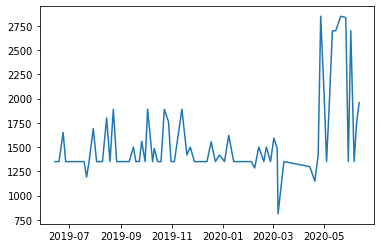

In [261]:
import matplotlib.pyplot as plt

plt.plot(d2['Date'], d2['Total'])

Add day/month/year columns

In [262]:
d2["day"] = d2['Date'].map(lambda x: x.day)
d2["month"] = d2['Date'].map(lambda x: x.month)
d2["year"] = d2['Date'].map(lambda x: x.year)
d2.drop('Date', inplace=True, axis=1)
d2.reset_index(inplace=True)

d2.head()

,Date,Total,Кофе_Арабика,Галычина,Ложечка,Мешалка,Маршмелоу,Салфетка,Селянське,Стик,Сироп,Сироп_Емми,Трубочка,Холдер,day,month,year
0,2019-06-14,1350.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,6,2019
1,2019-06-19,1350.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,6,2019
2,2019-06-24,1650.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24,6,2019
3,2019-06-27,1350.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,6,2019
4,2019-07-03,1350.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,7,2019


## Logistic Regresssion Model

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

features_cols = d2.columns[2:]
X_train, X_test, y_train, y_test = train_test_split(d2[features_cols], d2['Total'], test_size=0.25, random_state=42)

In [264]:
# Train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

# Calculate errors
from sklearn.metrics import mean_squared_error as mse
err_rmse = np.sqrt(mse(y_test, predictions))
print('RMSE', err_rmse)

RMSE 531.3588241480516


In [265]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.63 %.


Compare the model to the data visually

In [266]:
# Use datetime for creating date objects for plotting
import datetime

# Dates of training values
#feature_list = list(drag.columns)
months = d2['month']
days = d2['day']
years = d2['year']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': d2['Total']})

# Dates of predictions
months = X_test['month']
days = X_test['day']
years = X_test['year']

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
# Graph labels
plt.xlabel('Date')
plt.ylabel('Total Orderа')
plt.title('Logistic Regression (с карантином)')

Text(0.5, 1.0, 'Logistic Regression (с карантином)')

## Same model with mean order Totals for quarantine dates

In [267]:
mask = ('2020-03-01' < d2['Date']) & (d2['Date'] < '2020-05-01')
quarantine_period = d2[mask]
quarantine_period['Total'] = d2['Total'].mean()

quarantine_period.head()


,Date,Total,Кофе_Арабика,Галычина,Ложечка,Мешалка,Маршмелоу,Салфетка,Селянське,Стик,Сироп,Сироп_Емми,Трубочка,Холдер,day,month,year
60,2020-03-02,1543.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2,3,2020
61,2020-03-06,1543.1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,3,2020
62,2020-03-07,1543.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,3,2020
63,2020-03-14,1543.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,3,2020
64,2020-04-14,1543.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14,4,2020


In [268]:
d2_no_q = d2.copy()
d2_no_q[mask] = quarantine_period
d2_no_q['Total'] = d2_no_q['Total'].astype(int)
d2_no_q.head()

,Date,Total,Кофе_Арабика,Галычина,Ложечка,Мешалка,Маршмелоу,Салфетка,Селянське,Стик,Сироп,Сироп_Емми,Трубочка,Холдер,day,month,year
0,2019-06-14,1350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,6,2019
1,2019-06-19,1350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,6,2019
2,2019-06-24,1650,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24,6,2019
3,2019-06-27,1350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,6,2019
4,2019-07-03,1350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,7,2019


## LR Model w/o quarantine

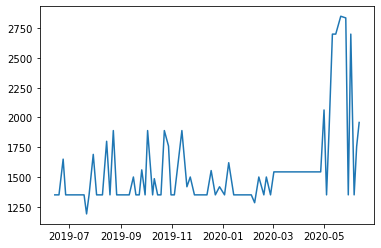

In [269]:
plt.plot(d2_no_q['Date'], d2_no_q['Total'])

In [270]:
features_cols = d2_no_q.columns[2:]
Xq_train, Xq_test, yq_train, yq_test = train_test_split(d2_no_q[features_cols], d2_no_q['Total'], test_size=0.25, random_state=42)
# Train the model
lr_q = LogisticRegression()
lr_q.fit(Xq_train, yq_train)

# Make predictions
predictions_q = lr_q.predict(Xq_test)

# Calculate errors
err_rmse = np.sqrt(mse(yq_test, predictions_q))
print('RMSE', err_rmse)

RMSE 432.42149576541635


In [271]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(predictions_q - yq_test)
mape = 100 * (errors / yq_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.89 %.


Text(0.5, 1.0, 'Logistic Regression (без карантина)')

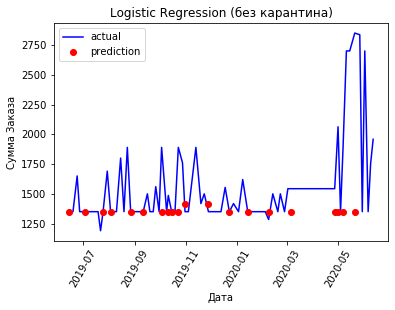

In [272]:
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': d2_no_q['Total']})

# Dates of predictions
months = Xq_test['month']
days = Xq_test['day']
years = Xq_test['year']

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions_q})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
# Graph labels
plt.xlabel('Date')
plt.ylabel('Total Orderа')
plt.title('Logistic Regression (без карантина)')

## Test K-Neighbors Model for data w/o quarantine

In [273]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(Xq_train, yq_train)

# Make predictions
predictions_knn = knn.predict(Xq_test)

# Calculate errors
err_rmse = np.sqrt(mse(yq_test, predictions_knn))
print('RMSE', err_rmse)

RMSE 418.2053658192348


In [274]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(predictions_knn - yq_test)
mape = 100 * (errors / yq_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.22 %.


In [275]:
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': d2_no_q['Total']})

# Dates of predictions
months = Xq_test['month']
days = Xq_test['day']
years = Xq_test['year']

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions_knn})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'r*', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
# Graph labels
plt.xlabel('Date')
plt.ylabel('Total Orderа')
plt.title('K-Nearest Neighbors (без карантина)')

Text(0.5, 1.0, 'K-Nearest Neighbors (без карантина)')

## Random Forest Model

In [276]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xq_train, yq_train)

# Make predictions
predictions_rf = rf.predict(Xq_test)

# Calculate errors
err_rmse = np.sqrt(mse(yq_test, predictions_rf))
print('RMSE', err_rmse)

RMSE 304.733309387077


In [277]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(predictions_rf - yq_test)
mape = 100 * (errors / yq_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 85.04 %.


In [278]:
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': d2_no_q['Total']})

# Dates of predictions
months = Xq_test['month']
days = Xq_test['day']
years = Xq_test['year']

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions_rf})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'r*', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
# Graph labels
plt.xlabel('Date')
plt.ylabel('Total Orderа')
plt.title('Random Forest (без карантина)')

Text(0.5, 1.0, 'Random Forest (без карантина)')

## Fit a curve to the model

### Cubic fit

In [279]:
# Sort dates in chronological order
predictions_data.sort_values(by=['date'], inplace=True)
predictions_data['date']

# Change dates to integer + remove time
dates_list = []
dates_dict = {}
# For loop adding string dates to the list
for i in predictions_data['date']:
  dt_str = datetime.datetime.strftime(i, '%Y-%m-%d')
  dates_list.append(dt_str)

# For loop linking the dates with the number line
for n in range(1, 21):
  dates_dict[n] = dates_list[n-1]

# Coefficients of the polynomial fit
coeffs_3 = np.polyfit(x, y, 3)
dates_dict

TypeError: expected x and y to have same length

Text(0.5, 1.0, 'Cubic Fit of the Random Forest')

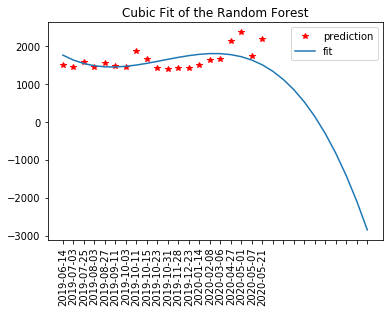

In [280]:
x3 = np.arange(1, 31)
# Plot the predicted values
plt.plot(range(1, 21), predictions_data['prediction'], 'r*', label = 'prediction')

# Plot the line of polynomial fit
plt.plot(x3, coeffs[0]*x3**3+coeffs[1]*x3**2+coeffs[2]*x3+coeffs[3], label='fit')
plt.xticks(x,  dates_dict.values(), rotation = '90')

plt.legend()
plt.title('Cubic Fit of the Random Forest')


### Quartic Fit

In [281]:
x4= np.arange(1,31)
# Coefficients of the polynomial fit
coeffs_4 = np.polyfit(x, y, 4)

# Plot the predicted values
plt.plot(np.arange(1, 21), predictions_data['prediction'], 'r*', label = 'prediction')

# Plot best-fit line
plt.plot(x4, coeffs_4[0]*x4**4+coeffs_4[1]*x4**3+coeffs_4[2]*x4**2+coeffs_4[3]*x4+coeffs_4[4], label='fit')
plt.legend()
plt.xticks(x,  dates_dict.values(), rotation = '90')
plt.title('Quartic Fit of the Random Forest')

TypeError: expected x and y to have same length

Polynomial fits are probably ineffective as they decrease/increase unrealistically.
Let's try linear and trigonometric fits.

### Linear fit

In [282]:
coeffs_lin = np.polyfit(x, y, 1)
x_lin = np.arange(1,31)
# Plot the predicted values
plt.plot(np.arange(1,21), predictions_data['prediction'], 'r*', label = 'prediction')

# Plot line of fit
plt.plot(x_lin, coeffs_lin[0]*x_lin+coeffs_lin[1], label='fit')

plt.xticks(x,  dates_dict.values(), rotation = '90')
plt.legend()
plt.title('Linear fit of the Random Forest')

TypeError: expected x and y to have same length

remove upper outliers to refine model?

### Complex Trig Fit

Finally, let's try function of a format  y = 𝑥+exp(−𝑎𝑥)sin(𝑏𝑥), a & b are real numbers.


In [283]:
from scipy.optimize import curve_fit

def f(x, a, b):
  return x+np.exp(-a*x)+np.sin(b*x)+1380

x = np.arange(1, 31)
#x = np.linspace(0, 10, 100)  
y1 = f(x, 53000256443450, -40)
#plt.plot(x, y1)
vals, cov = curve_fit(f, x, y1)

Text(0.5, 1.0, 'Linear fit of the Random Forest')

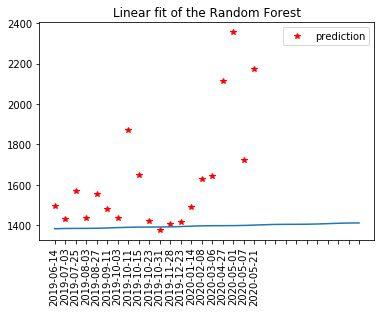

In [284]:
# Plot the predicted values
plt.plot(np.arange(1,21), predictions_data['prediction'], 'r*', label = 'prediction')

# Plot line of fit
plt.plot(x, f(x, *vals))

plt.xticks(x,  dates_dict.values(), rotation = '90')
plt.legend()
plt.title('Linear fit of the Random Forest')

## Using prophet to predict time series

In [297]:
# Create a df to use with prophet time series prediction
pr_df = pd.DataFrame(data={'ds':d2_no_q['Date'], 'y':d2_no_q['Total']})
pr_df

,ds,y
0,2019-06-14,1350
1,2019-06-19,1350
2,2019-06-24,1650
3,2019-06-27,1350
4,2019-07-03,1350
...,...,...
75,2020-05-30,1350
76,2020-06-02,2700
77,2020-06-06,1350
78,2020-06-09,1756


In [303]:
from fbprophet import Prophet
pr = Prophet(yearly_seasonality=True, daily_seasonality=True)
pr.fit(pr_df)

In [304]:
# Make a dataframe for the next year
future = pr.make_future_dataframe(periods=365)
future.tail()

,ds
440,2021-06-08
441,2021-06-09
442,2021-06-10
443,2021-06-11
444,2021-06-12


In [305]:
# Make predictions 
forecast = pr.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-14,79.167994,1137.998984,1651.502315,79.167994,79.167994,1315.547934,1315.547934,1315.547934,1284.569195,...,131.146499,131.146499,131.146499,-100.167760,-100.167760,-100.167760,0.0,0.0,0.0,1394.715928
1,2019-06-19,84.541326,1129.949004,1631.996475,84.541326,84.541326,1314.677236,1314.677236,1314.677236,1284.569195,...,107.902602,107.902602,107.902602,-77.794561,-77.794561,-77.794561,0.0,0.0,0.0,1399.218562
2,2019-06-24,89.914658,1101.959456,1622.833454,89.914658,89.914658,1282.387392,1282.387392,1282.387392,1284.569195,...,3.855338,3.855338,3.855338,-6.037141,-6.037141,-6.037141,0.0,0.0,0.0,1372.302050
3,2019-06-27,93.138658,1161.689781,1661.410507,93.138658,93.138658,1322.043032,1322.043032,1322.043032,1284.569195,...,10.952642,10.952642,10.952642,26.521195,26.521195,26.521195,0.0,0.0,0.0,1415.181690
4,2019-07-03,99.586656,1243.453380,1766.411993,99.586656,99.586656,1411.627777,1411.627777,1411.627777,1284.569195,...,107.902602,107.902602,107.902602,19.155980,19.155980,19.155980,0.0,0.0,0.0,1511.214433


In [307]:
pr.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Order (грн.)')

Text(53.75, 0.5, 'Order (грн.)')

In [313]:
import plotly.express as px
fig = px.line(forecast, x='ds', y='yhat')
fig.update_xaxes(rangeslider_visible=True)

In [322]:
# Evaluate how good the predictions are as time goes by
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(pr, initial='150 days', period='30 days', horizon = '200 days')

# A table of perforamce metrics after cross validation
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-11-25 00:00:00 and 2019-11-25 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,18 days,4.958882e+05,704.193281,656.499365,0.486296,0.570176,0.0
1,23 days,4.185421e+06,2045.830267,1562.469228,1.063835,0.622606,0.0
2,28 days,2.330700e+07,4827.732694,3576.124452,2.555432,1.557495,0.0
3,33 days,7.077356e+07,8412.702260,6822.298151,4.837423,4.488258,0.0
4,39 days,1.488758e+08,12201.467565,11030.769530,7.954809,8.117350,0.0


In [323]:
# Plot mean av. perc. error with time 
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')